In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

float64


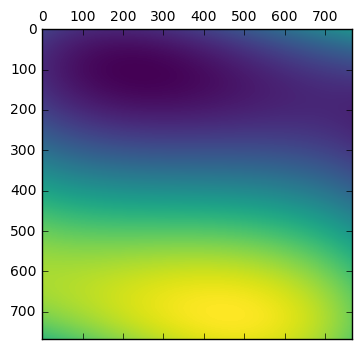

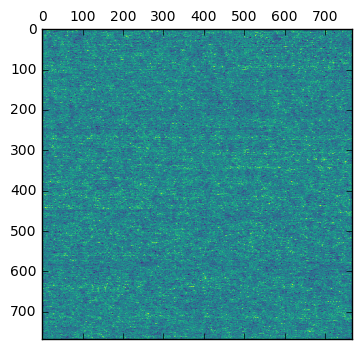

In [2]:
data = np.genfromtxt('../Data/AFM/TXT/10-10_Adh')

print (data.dtype)

p_init = models.Polynomial2D(degree = 3)
fit_p = fitting.LevMarLSQFitter()

x, y = data.shape

yy, xx = np.mgrid[0:x, 0:y]

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p = fit_p(p_init, xx, yy, data)

bkg = p(xx, yy)
final = data - bkg

plt.matshow(bkg, cmap = 'viridis')
plt.matshow(final, cmap = 'viridis')

In [3]:
x, y = final.shape

print (x)
print (y) 

768
768


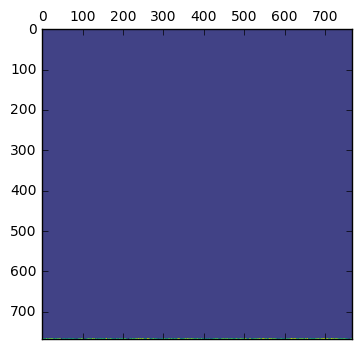

In [4]:
alignbkg = np.empty([x, y])

for i in range(x-1):
    
    xx = np.empty(x)
    yy = np.empty(y)
    
    for j in range(y-1):
        xx[j] = final[i, j]
    
    # Fit the data using a Gaussian
    g_init = models.Polynomial1D(degree = 3)
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, xx, yy)
    
alignbkg[i] = g(xx)
    
plt.matshow(alignbkg, cmap = 'viridis')

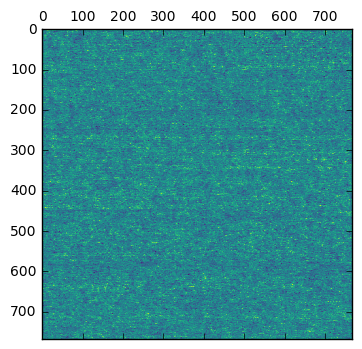

In [5]:
test1 = final - alignbkg

plt.matshow(test1, cmap = 'viridis')

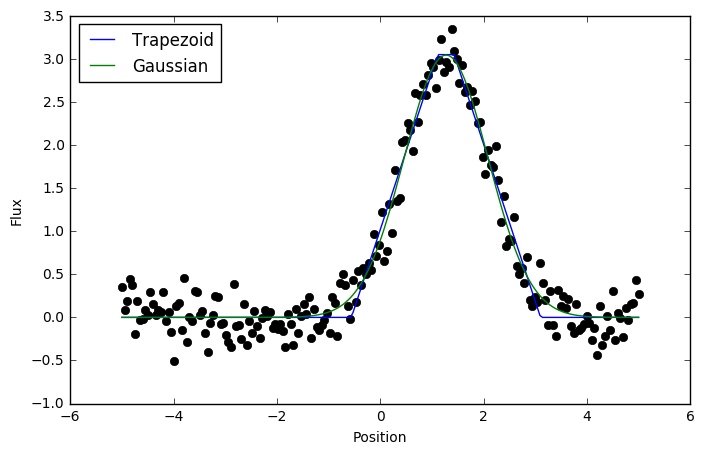

In [6]:
# Generate fake data
np.random.seed(0)
x = np.linspace(-5., 5., 200)
y = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)

# Fit the data using a box model
t_init = models.Trapezoid1D(amplitude=1., x_0=0., width=1., slope=0.5)
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, x, y)

# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
plt.plot(x, t(x), label='Trapezoid')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

#print (g(x))